In [187]:
## Import 
#### Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
#### Packages for Model Diagonistics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score,classification_report

In [2]:
bank_data = pd.read_csv("D:/Top_mentor/Nov/19th_nov/batch88assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/bank-full.csv", delimiter = ';')

In [3]:
df1=bank_data.copy()

In [4]:
df2=bank_data.copy()

In [5]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df1.shape

(45211, 17)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [22]:
df1.duplicated().sum()

0

In [8]:
df1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
depo = sum(df1['y']=='yes')
print('Numbers of existing terms depositors', depo)

Numbers of existing terms depositors 5289


In [10]:
## Number of housing holder has terms deposit 
house_depo=len(df1[(df1['y']=='yes') & (df1['housing']=='yes')])
print('Number of housing holder has terms deposit',house_depo)

Number of housing holder has terms deposit 1935


In [11]:
## Number of loanholder has terms deposit 
loan_depo=len(df1[(df1['y']=='yes') & (df1['loan']=='yes')])
print('Number of loan holder has terms deposit',loan_depo)

Number of loan holder has terms deposit 484


In [12]:
## Number of defaulter 
defaulter = sum(df1['default']=='yes')
print('Number of defaulter', defaulter)

Number of defaulter 815


In [13]:
defaulter_with_depo = len(df1[(df1['default']=='yes') & (df1['y']=='yes')])
print('Number of defaulter with deposit', defaulter_with_depo)

Number of defaulter with deposit 52


In [14]:
month_depo=df2[df2['y']=='yes']
month_depo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


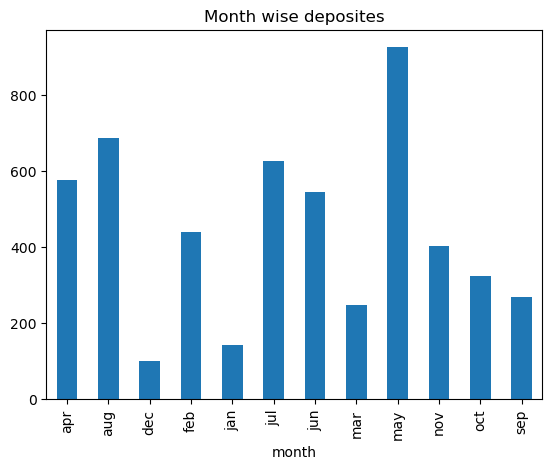

In [53]:
## Monthwise deposit 
month_depo.groupby('month').count()['y'].plot(kind='bar')
plt.title('Month wise deposites')
plt.show()

In [16]:
job_balance=df2[df2['y']=='yes'][['job','balance', 'y']]
job_balance.head(2)

,job,balance,y
83,admin.,2343,yes
86,admin.,45,yes


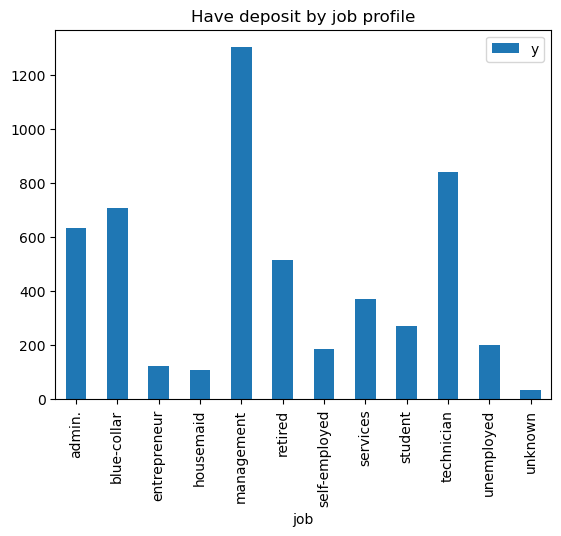

In [52]:
job_balance.groupby('job').count()[['y']].plot(kind='bar')
plt.title('Have deposit by job profile')
plt.show()

In [18]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
no_depo = df2[df2['y']=='no'][['job','balance', 'y']]

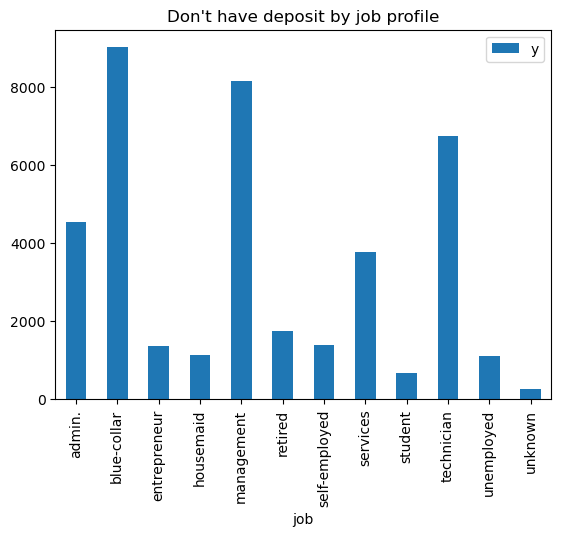

In [70]:
no_depo.groupby('job').count()[['y']].plot(kind='bar')
plt.title("Don't have deposit by job profile")
plt.show()

In [29]:
df2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


C:\Users\Acer\AppData\Local\Temp\ipykernel_3592\2179293235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('marital').mean()['balance'].plot(kind='bar')


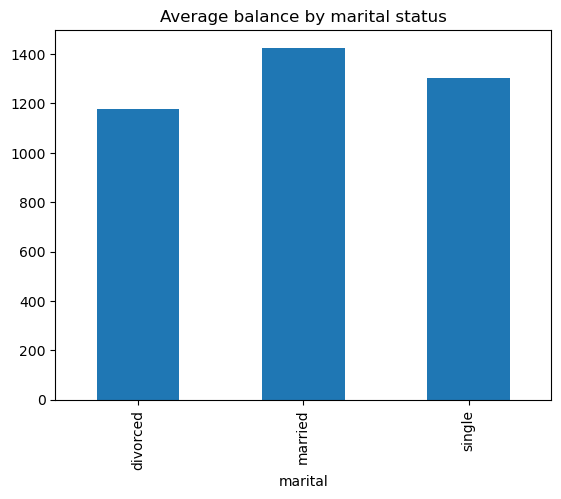

In [50]:
df2.groupby('marital').mean()['balance'].plot(kind='bar')
plt.title("Average balance by marital status")
plt.show()

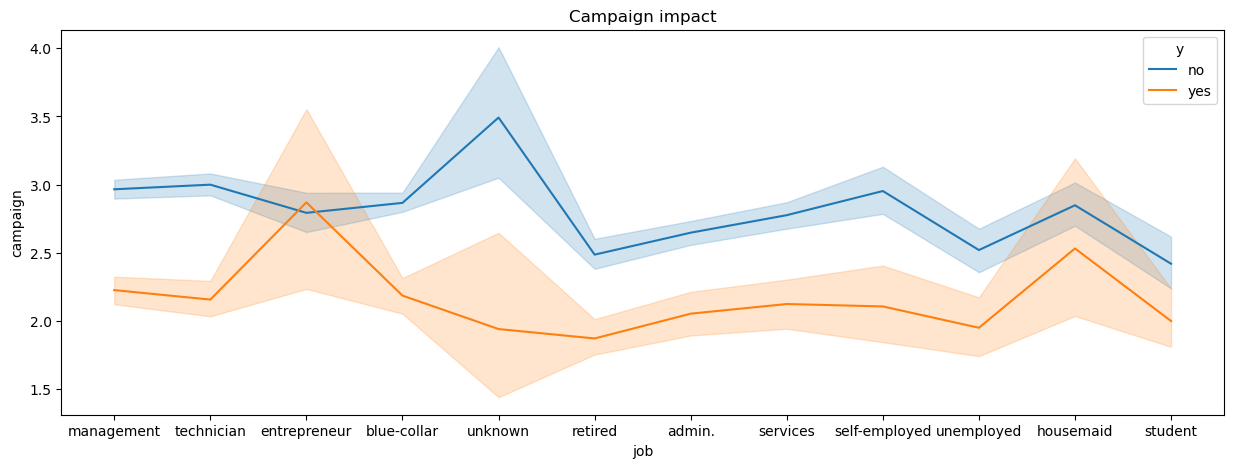

In [48]:
plt.figure(figsize=(15,5))
sns.lineplot(x='job',y='campaign', hue='y', data =df2 )
plt.title("Campaign impact")
plt.show()

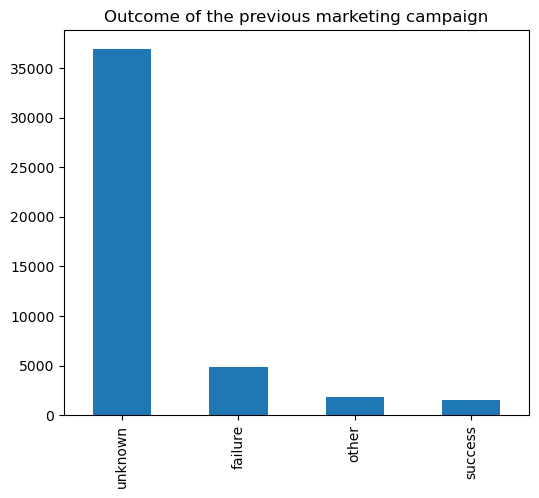

In [58]:
plt.figure(figsize=(6,5))
df1['poutcome'].value_counts().plot(kind='bar')
plt.title("Outcome of the previous marketing campaign")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_3592\2821932768.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('job').mean()['previous'].plot(kind='bar', color='green')


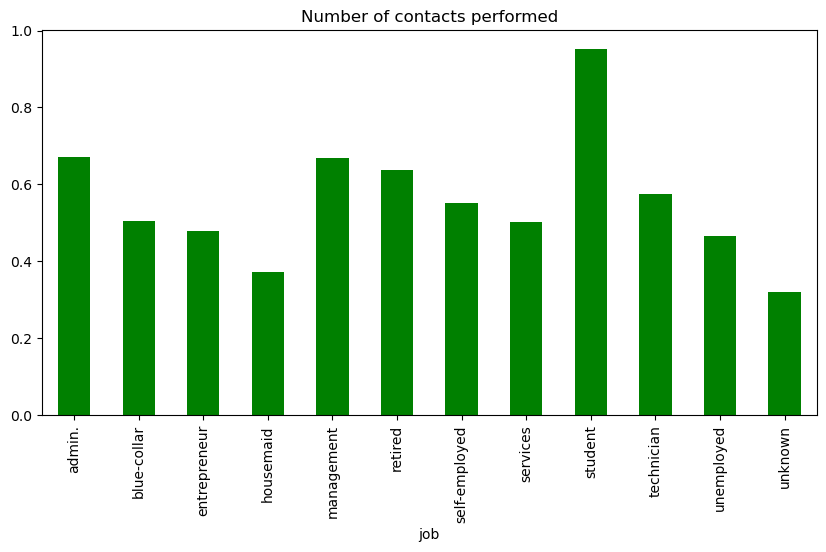

In [169]:
plt.figure(figsize=(10,5))
df1.groupby('job').mean()['previous'].plot(kind='bar', color='green')
plt.title("Number of contacts performed")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_3592\4198566619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


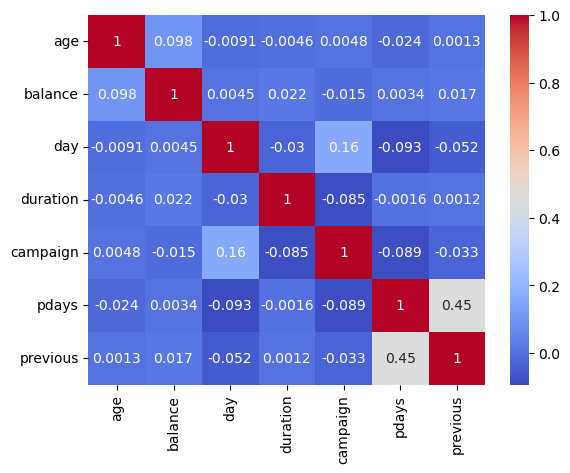

In [91]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

# Model prediction 

In [69]:
df2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [141]:
## Encodeing 
dummy = pd.get_dummies(df2[['job','marital','education','contact','month', 'poutcome',]])
dummy.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [136]:
## Replace 'yes' by 1 and 'no' by 0
df2['default'] = df2['default'].replace(to_replace={'yes':1, 'no':0})
df2['housing'] = df2['housing'].replace(to_replace={'yes':1, 'no':0})
df2['loan'] = df2['loan'].replace(to_replace={'yes':1, 'no':0})
df2['y'] = df2['y'].replace(to_replace={'yes':1, 'no':0})

In [142]:
df3 = pd.concat([df2,dummy], axis=1)

# X and y split

In [145]:
X = df3[['age','default', 'housing', 'loan','job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']]

In [146]:
X.head(2)

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [149]:
y=df3['y']

In [151]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=365)

# Logistic regression 

In [155]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train,y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
pred = lg_model_fit.predict(X_test)

In [154]:
acc = accuracy_score(y_test,pred)
prc = precision_score(y_test,pred)
clf = classification_report(y_test,pred)
conf = confusion_matrix(y_test,pred)

In [164]:
print('Accuracy of model', acc)

Accuracy of model 0.8935087913303107


In [165]:
print('Accuracy of precision_score', prc)

Accuracy of precision_score 0.6655052264808362


In [163]:
clf

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7985\n           1       0.67      0.18      0.28      1058\n\n    accuracy                           0.89      9043\n   macro avg       0.78      0.58      0.61      9043\nweighted avg       0.87      0.89      0.87      9043\n'

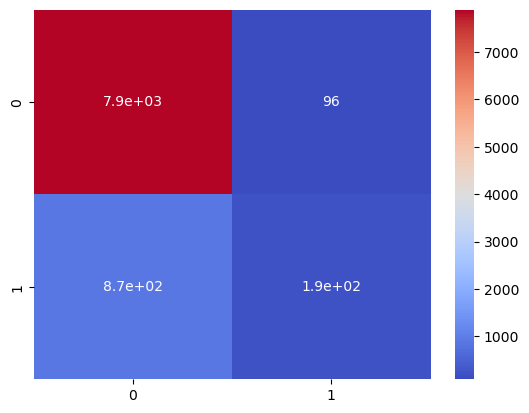

In [172]:
sns.heatmap(conf, annot=True, cmap = 'coolwarm')
plt.show()